# 1. Imports and Data Loading

In [1]:
import sys
import os

# Get the directory path of the notebook
notebook_directory = os.path.dirname(os.path.abspath("__file__"))

# Get the directory path of the project (one level up)
project_directory = os.path.dirname(notebook_directory)

# Add the project directory to the Python module search path
sys.path.append(project_directory)

# Now you can import the LoadJSON module from DataLoaderLocal
from shared_utilities.DataLoaderLocal import LoadReviews

import pandas as pd
import utility_func as utils
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

# Adjust display options to show all columns
pd.set_option('display.max_columns', None)

In [2]:
reviews = LoadReviews()

utils.YelpDatasets_Reviews(reviews_df = reviews)


Reviews DataFrame's head:


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
14,UBp0zWyH60Hmw6Fsasei7w,4Uh27DgGzsp6PqrH913giQ,otQS34_MymijPTdNBoBdCw,4,0,2,0,The bun makes the Sonoran Dog. It's like a snu...,2011-10-27 17:12:05
75,ymhbOMW63B_vGaRFR3XT0A,yZdAhQ_KmKuCZmbBy9YDQg,5Ce3lZksYVkCbrihqylVHQ,5,0,0,0,I just started going to Sushi Nara this month ...,2014-07-25 17:56:26
93,onlgwy5qGDEzddsrnIvtWg,pYXeL0RCqus2IfhthYCOyA,W7NxQw8UYFR0HLPrI08tvw,4,0,0,0,Don't know what it is but If my tummy's feelin...,2012-02-01 14:21:25
147,ypFqmURIY41F4pWaMW1VrQ,hToW2eoTAYlOcuNz7I73Cg,7L1kXfwU5XM6f6Jxo_L7Yg,5,1,0,0,We've been coming here since I was a kid. The ...,2015-07-03 22:36:04


In [3]:
reviews = reviews.sample(n=50000, random_state=42)
display(reviews)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
3072330,0MFy30StA0Ns8ILccsowyA,S-cMvM-TbIg1oYMLPneoBg,43MDfrU28FYjfpamNfL9GA,4,2,0,0,Great food and environment. Loved the wine.\n\...,2013-11-30 22:31:33
3716689,LWER5lk9yGVoKr36yYxKsQ,RIXIoCTafjr1auUJkV3fLg,r6Unwg-mxv_3JrEjQ24_TQ,4,0,0,0,This Costco has very helpful staff and is alwa...,2014-06-06 23:02:11
6289074,pIdyWcCclKeplPN8D4Ft2A,a2DGFEIov1L7X9rKdVmN6A,xuYPogbBSHAtOebONVhprA,5,3,0,3,We have been coming here our whole lives and w...,2021-06-23 02:54:36
3245132,hWhJGNQEZRXWiBDp2XR2sw,DT0Elf41cptTnuz16auxKQ,lC0_e8F1zAstzhj-O3eQZg,5,0,0,0,This place is a must when you come Tucson! I'm...,2020-01-23 20:10:01
442448,fOKCRjS5DMGj4uCKvkcNUA,7F7Z-PCZjfxie15f9vl8ww,8QJTzIaR5FceGds8HBSIig,5,0,0,0,We loved our visit at Barrio today. They had a...,2017-09-17 22:39:09
...,...,...,...,...,...,...,...,...,...
6573320,K_7mBVWW7WpvrRIoehN2tg,1h-qSEwbpis0msbeIv15hQ,tszRCO-RchPXPZlsTCYgbA,1,1,0,0,SO disappointing. Took out of town guests afte...,2013-12-02 04:26:34
1273507,soYb-5uBROQ9l3xSl5sTFw,EAHCCgMFoJxlOPcCPQ91SQ,8YM2oTP6LZYQlwB6Hk9lLA,5,2,0,1,Came on a Wednesday night with friends from th...,2019-12-24 23:33:52
2026866,C-cz-XICTQxE_mcpTCjhdQ,RSHYLY1ypXEBd8pckrZfiA,xNZMbdl8ga_wjBPFMZOsyQ,1,2,0,0,"Absolutely terrible service, dead bug in my ri...",2019-06-16 07:45:49
1665638,Az6XBFwUXXp5tPOVGbvt2g,Vk8vZOJn2aFgRa-N6bmC6g,3pamD1Qj7MXrF6dglK_guQ,3,0,1,0,"The atmosphere at Club Congress is awesome, ve...",2008-07-07 22:38:01


# 2. EDA - Exploratory Data Analysis

## 2.1. EDA - Times series for Number of Reviews (regardless if the sentiment)

In [4]:
# change the structure of date column
reviews['date'] = pd.to_datetime(reviews['date']).dt.strftime('%Y-%m')

In [5]:
#group by date and review_id to get the number of reviews per month and year
reviews_per_month = reviews.groupby(['date'])['review_id'].count().reset_index()
reviews_per_month.columns = ['date', 'count']
reviews_per_month['date'] = pd.to_datetime(reviews_per_month['date'])
reviews_per_month = reviews_per_month.sort_values(by='date')
reviews_per_month.head()

,date,count
0,2005-03-01,2
1,2005-05-01,1
2,2005-07-01,2
3,2005-08-01,2
4,2005-09-01,1


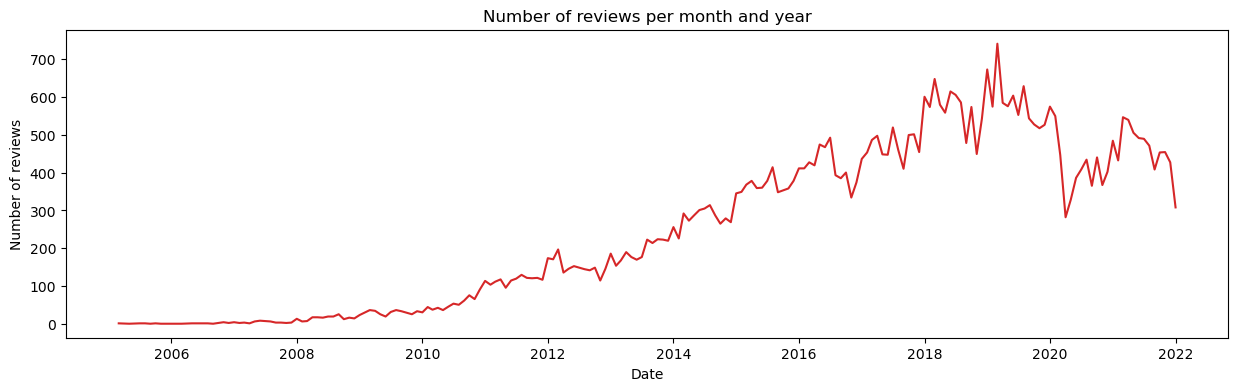

In [6]:
def plot_df(x, y, title="", xlabel='Date', ylabel='Number of reviews', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(x=reviews_per_month['date'], y=reviews_per_month['count'], title='Number of reviews per month and year')

In [7]:
'''#Since all the values are positive, we can show this on both sides of the Y axis to emphasize the growth.

x = reviews_per_month['date'].values
y1 = reviews_per_month['count'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-90000, 90000)
plt.title('Number of reviews per month and year (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(reviews_per_month['date']), xmax=np.max(reviews_per_month['date']), linewidth=.5)
plt.show()'''

"#Since all the values are positive, we can show this on both sides of the Y axis to emphasize the growth.\n\nx = reviews_per_month['date'].values\ny1 = reviews_per_month['count'].values\n\n# Plot\nfig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)\nplt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')\nplt.ylim(-90000, 90000)\nplt.title('Number of reviews per month and year (Two Side View)', fontsize=16)\nplt.hlines(y=0, xmin=np.min(reviews_per_month['date']), xmax=np.max(reviews_per_month['date']), linewidth=.5)\nplt.show()"

### 2.1.1. EDA - Times series for Top 5 businesses in Tucson with the highest ammount of reviews 

In [8]:
# Extracting the year from the date
count_rev_bus = reviews.groupby(['business_id', 'date'])['review_id'].count().reset_index()
count_rev_bus.columns = ['business_id', 'date', 'count']
count_rev_bus['date'] = pd.to_datetime(count_rev_bus['date'])
count_rev_bus = count_rev_bus.sort_values(by=['date','business_id'])
count_rev_bus['year'] = count_rev_bus['date'].dt.year
count_rev_bus.head()

,business_id,date,count,year
6893,9zlIJ7Q5W4AENjpGgaNSsQ,2005-03-01,1,2005
27360,f82dhKNiUXsDVPMLqKYiIQ,2005-03-01,1,2005
36876,tE2Zm5VnN7nymZAAMjOtEg,2005-05-01,1,2005
16438,OxBZqeYH5xuusEPp9ml7-g,2005-07-01,1,2005
27855,fpQEKdtFprof-RJx1MRR9g,2005-07-01,1,2005


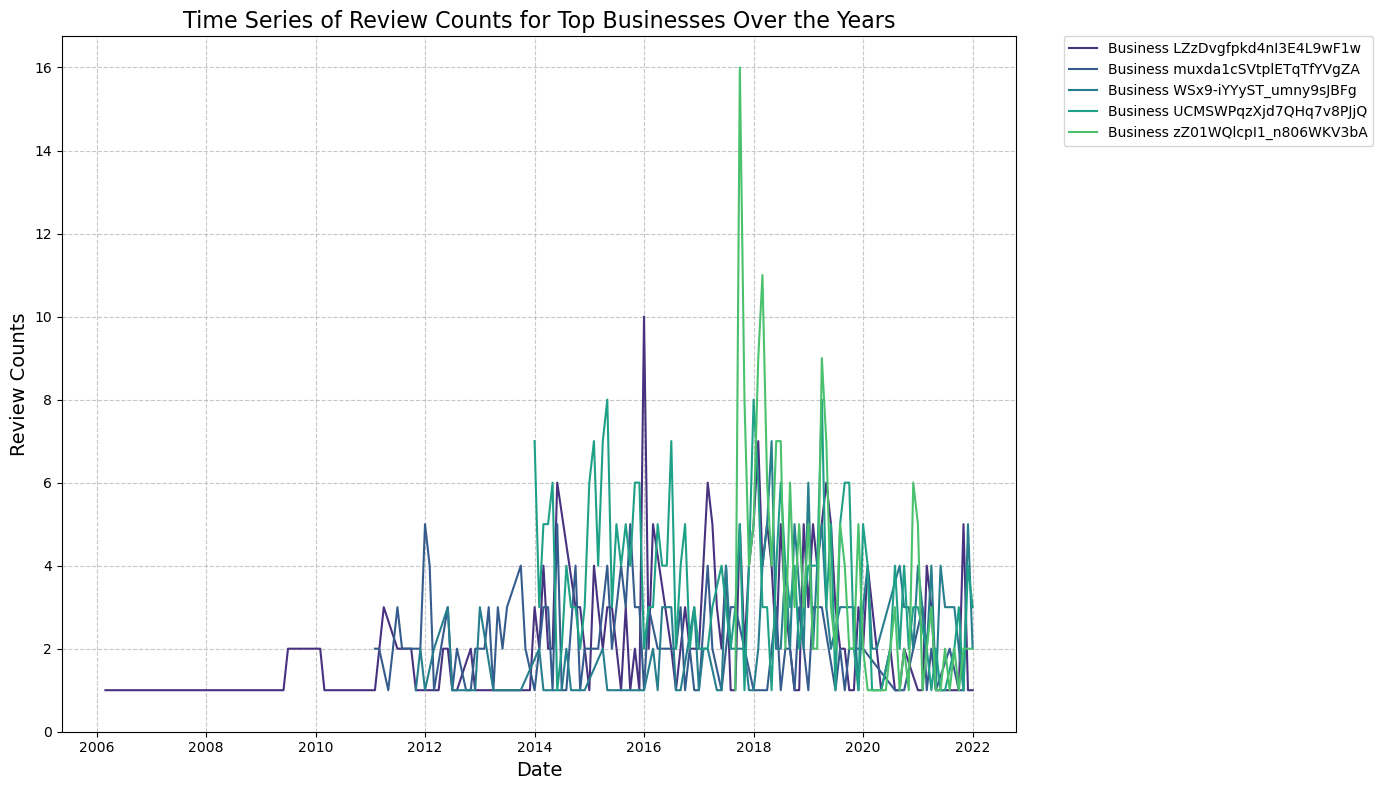

In [9]:
def plot_top_businesses_over_time(df, top_businesses_series):
    """
    Plot the time series of review counts for the top businesses over the years.

    Parameters:
    - df: DataFrame with columns 'business_id', 'date', 'count', and 'year'.
    - top_businesses_series: Pandas Series with the top businesses and their review counts.
    """
    # Convert the Series to a DataFrame
    top_businesses_df = top_businesses_series.reset_index()

    # Filter the DataFrame to include only the top businesses
    top_businesses_df = df[df['business_id'].isin(top_businesses_df['business_id'])]

    # Plotting
    plt.figure(figsize=(14, 8))
    sns.set_palette("viridis")  # You can choose a different color palette if needed

    for business_id in top_businesses_df['business_id'].unique():
        business_data = top_businesses_df[top_businesses_df['business_id'] == business_id]
        sns.lineplot(x='date', y='count', data=business_data, label=f'Business {business_id}')

    plt.title('Time Series of Review Counts for Top Businesses Over the Years', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Review Counts', fontsize=14)
    plt.legend()
    
    # Set y-axis limits to start from 0
    plt.ylim(bottom=0)
    
    # Add grid for better readability
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Add a legend outside the plot
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    
    # Tight layout for better spacing
    plt.tight_layout()
    
    plt.show()

# Example usage:
# Assuming you have a list of top businesses called 'top_businesses_list'
top_businesses_series = count_rev_bus.groupby(['business_id'])['count'].sum().sort_values(ascending=False).head(5)
plot_top_businesses_over_time(count_rev_bus, top_businesses_series)

### 2.1.2. EDA - Times series decomposition

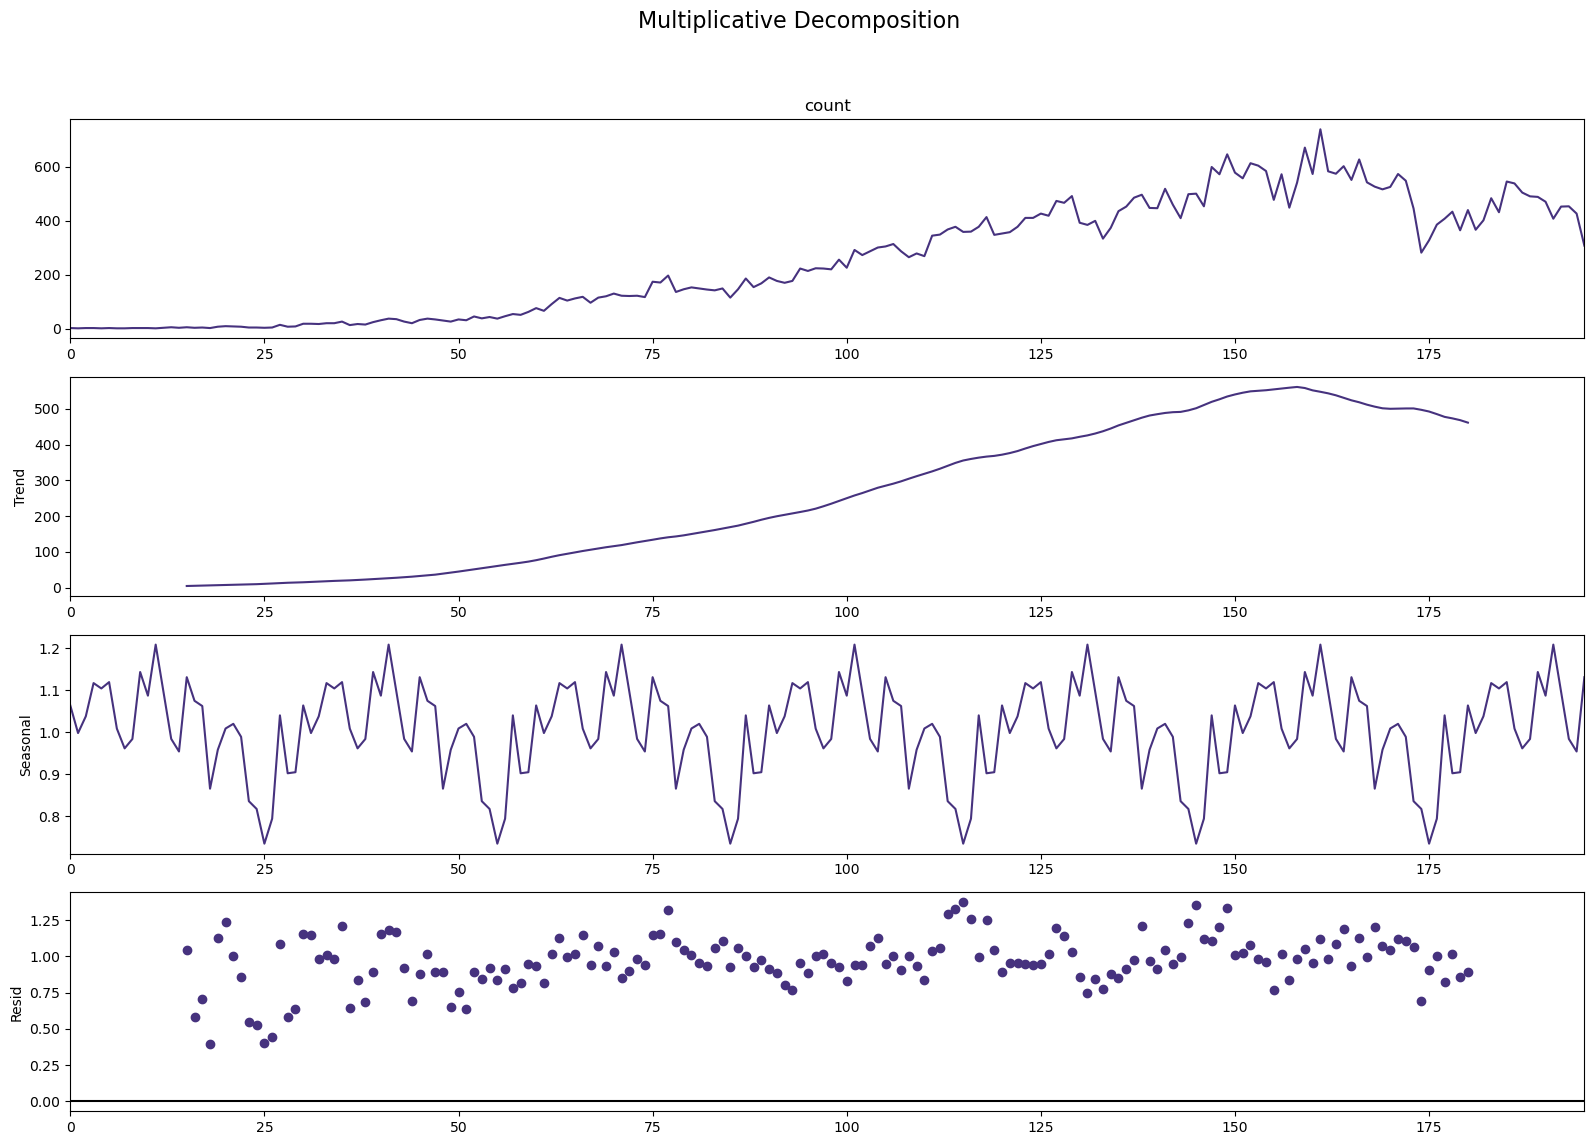

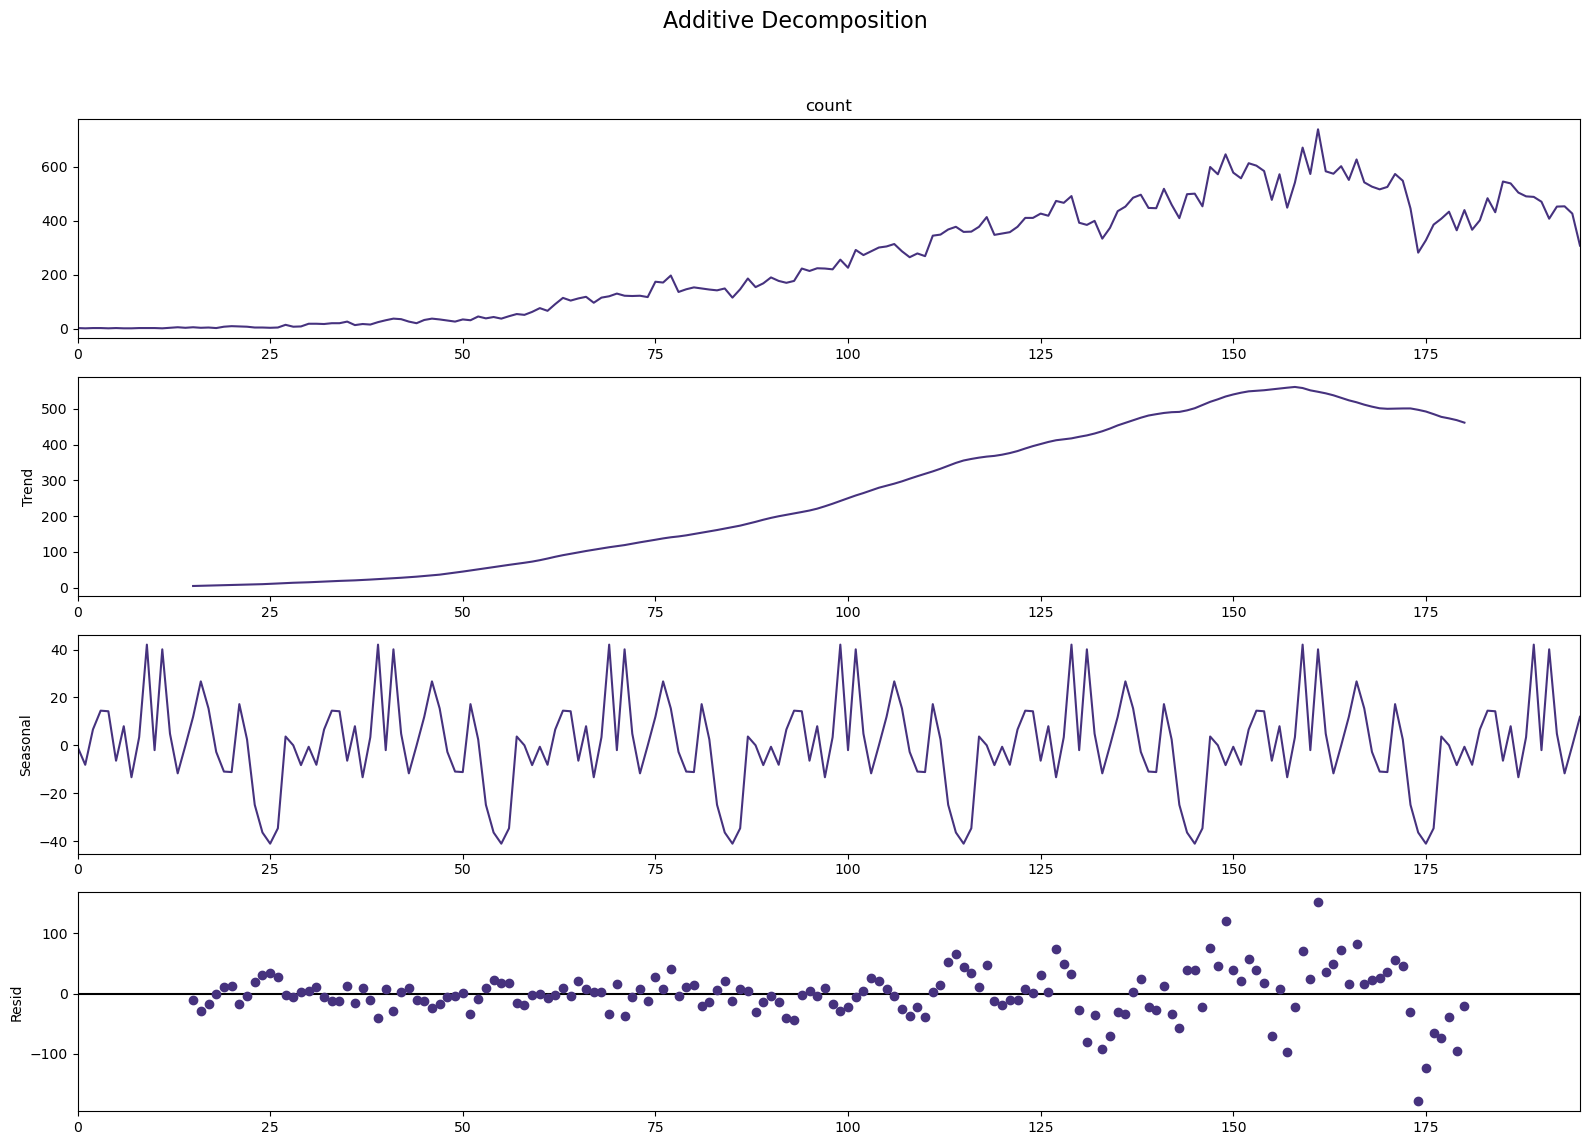

In [10]:
##### Decomposition of a time series can be performed by considering the series as an additive or multiplicative combination of the base level, trend, seasonal index and the residual term.
##The seasonal_decompose in statsmodels implements this conveniently.

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(reviews_per_month['count'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(reviews_per_month['count'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

## EDA 2.2. - Time series of review counts segregated by sentiments

In [11]:
#1 and 2 stars = -1 while 4 and 5 stars = +1
df = reviews
df = df[df['stars'] != 3]
df['sentiment'] = df['stars'].apply(lambda rating : +1 if rating > 3 else -1)

df_num = df.copy()

# Assuming replacing -1 and 1 with negative and positive respectively
df['sentiment'] = df['sentiment'].replace({-1: 'negative', 1: 'positive'})

df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m')
df_num['date'] = pd.to_datetime(df_num['date']).dt.strftime('%Y-%m')

# Dividing the reviews to positive and negative
pos = df[df['sentiment']=='positive'][['review_id','business_id','date','sentiment']]
neg = df[df['sentiment']=='negative'][['review_id','business_id','date','sentiment']]

#Preprocessing data
# change the structure of date column
#group by date and review_id to get the number of reviews per month and year
pos_pp = utils.preprocess_sentiment_df(pos)
neg_pp = utils.preprocess_sentiment_df(neg)

#Here we are going to sum the number of positive and negative reviews per month and year
#group by date and review_id to get the number of reviews per month and year
df_num = df_num.groupby(['date'])['sentiment'].sum().reset_index()
df_num['date'] = pd.to_datetime(df_num['date'])
df_num = df_num.sort_values(by='date')
df_num.rename(columns={'sentiment': 'sentiment_count_diff'}, inplace=True)
df_num

/var/folders/7h/r2qhkyrj6x951_n8cq54_49w0000gn/T/ipykernel_5653/637928171.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['stars'].apply(lambda rating : +1 if rating > 3 else -1)
/var/folders/7h/r2qhkyrj6x951_n8cq54_49w0000gn/T/ipykernel_5653/637928171.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['sentiment'].replace({-1: 'negative', 1: 'positive'})
/var/folders/7h/r2qhkyrj6x951_n8cq54_49w0000gn/T/ipykernel_5653/637928171.py:11: SettingWithCopyWarning: 
A

,date,sentiment_count_diff
0,2005-03-01,1
1,2005-05-01,1
2,2005-07-01,2
3,2005-08-01,1
4,2005-09-01,1
...,...,...
190,2021-09-01,70
191,2021-10-01,130
192,2021-11-01,155
193,2021-12-01,115


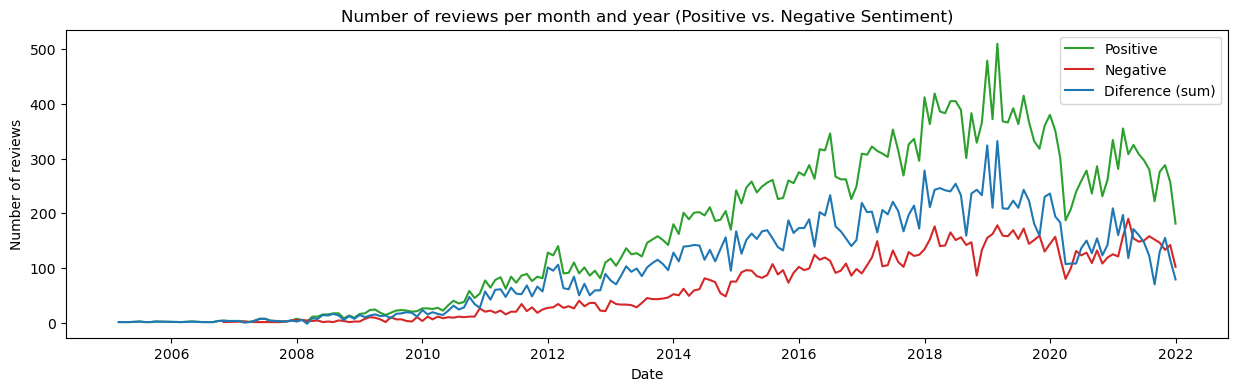

In [12]:
#Visualize the number of reviews per month and year (Positive vs. Negative Sentiment) and the sentiment sum 
utils.plot_df(x_pos=pos_pp['date'], y_pos=pos_pp['review_id'],
              x_neg=neg_pp['date'], y_neg=neg_pp['review_id'],
              x_df_num=df_num['date'], y_df_num=df_num['sentiment_count_diff'],
              title='Number of reviews per month and year (Positive vs. Negative Sentiment)')

In [13]:
'''#Since all the values are positive, we can show this on both sides of the Y axis to emphasize the growth.

x = pos_pp['date'].values
y1 = pos_pp['review_id'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-70000, 70000)
plt.title('Number of reviews per month and year (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(pos_pp['date']), xmax=np.max(pos_pp['date']), linewidth=.5)
plt.show()'''

"#Since all the values are positive, we can show this on both sides of the Y axis to emphasize the growth.\n\nx = pos_pp['date'].values\ny1 = pos_pp['review_id'].values\n\n# Plot\nfig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)\nplt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')\nplt.ylim(-70000, 70000)\nplt.title('Number of reviews per month and year (Two Side View)', fontsize=16)\nplt.hlines(y=0, xmin=np.min(pos_pp['date']), xmax=np.max(pos_pp['date']), linewidth=.5)\nplt.show()"

In [14]:
'''#Since all the values are positive, we can show this on both sides of the Y axis to emphasize the growth.

x = neg_pp['date'].values
y1 = neg_pp['review_id'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='red')
plt.ylim(-25000, 25000)
plt.title('Number of reviews per month and year (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(neg_pp['date']), xmax=np.max(neg_pp['date']), linewidth=.5)
plt.show()'''

"#Since all the values are positive, we can show this on both sides of the Y axis to emphasize the growth.\n\nx = neg_pp['date'].values\ny1 = neg_pp['review_id'].values\n\n# Plot\nfig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)\nplt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='red')\nplt.ylim(-25000, 25000)\nplt.title('Number of reviews per month and year (Two Side View)', fontsize=16)\nplt.hlines(y=0, xmin=np.min(neg_pp['date']), xmax=np.max(neg_pp['date']), linewidth=.5)\nplt.show()"

### EDA 2.2.1. - Time series decomposition

In [15]:
def business_review_counts(df):
    top_business = df.groupby(['business_id', 'date'])['review_id'].count().reset_index()
    top_business.columns = ['business_id', 'date', 'count']
    top_business['date'] = pd.to_datetime(top_business['date'])
    top_business = top_business.sort_values(by=['date', 'business_id'])
    top_business['year'] = top_business['date'].dt.year
    return top_business

# Assuming 'pos' and 'neg' are DataFrames with columns 'business_id', 'date', and 'review_id'
pos_business_counts = business_review_counts(pos)
neg_business_counts = business_review_counts(neg)

# Get the top 10 businesses by total review count
top_10_pos_business_ids = pos_business_counts.groupby('business_id')['count'].sum().nlargest(10).index
top_10_pos_business = pos_business_counts[pos_business_counts['business_id'].isin(top_10_pos_business_ids)]

top_10_neg_business_ids = neg_business_counts.groupby('business_id')['count'].sum().nlargest(10).index
top_10_neg_business = neg_business_counts[neg_business_counts['business_id'].isin(top_10_neg_business_ids)]



# Extracting the year from the date
pos = pos.groupby(['business_id', 'date'])['review_id'].count().reset_index()
pos.columns = ['business_id', 'date', 'count']
pos['date'] = pd.to_datetime(pos['date'])
pos = pos.sort_values(by=['date','business_id'])
pos['year'] = pos['date'].dt.year
pos.head(10)

,business_id,date,count,year
4701,9zlIJ7Q5W4AENjpGgaNSsQ,2005-03-01,1,2005
25023,tE2Zm5VnN7nymZAAMjOtEg,2005-05-01,1,2005
11165,OxBZqeYH5xuusEPp9ml7-g,2005-07-01,1,2005
18977,fpQEKdtFprof-RJx1MRR9g,2005-07-01,1,2005
11166,OxBZqeYH5xuusEPp9ml7-g,2005-08-01,1,2005
5746,CB_dHicpMxuWiuszbcPjfQ,2005-09-01,1,2005
3013,5z7N0Ih926XkkRW5-ZljuA,2005-10-01,1,2005
16850,b05wsdAVzpZlf7Tg_Ewpww,2005-10-01,1,2005
9896,LZzDvgfpkd4nI3E4L9wF1w,2006-03-01,1,2006
8810,JVdRFZ0fZmd36f-s3FtS5A,2006-05-01,1,2006


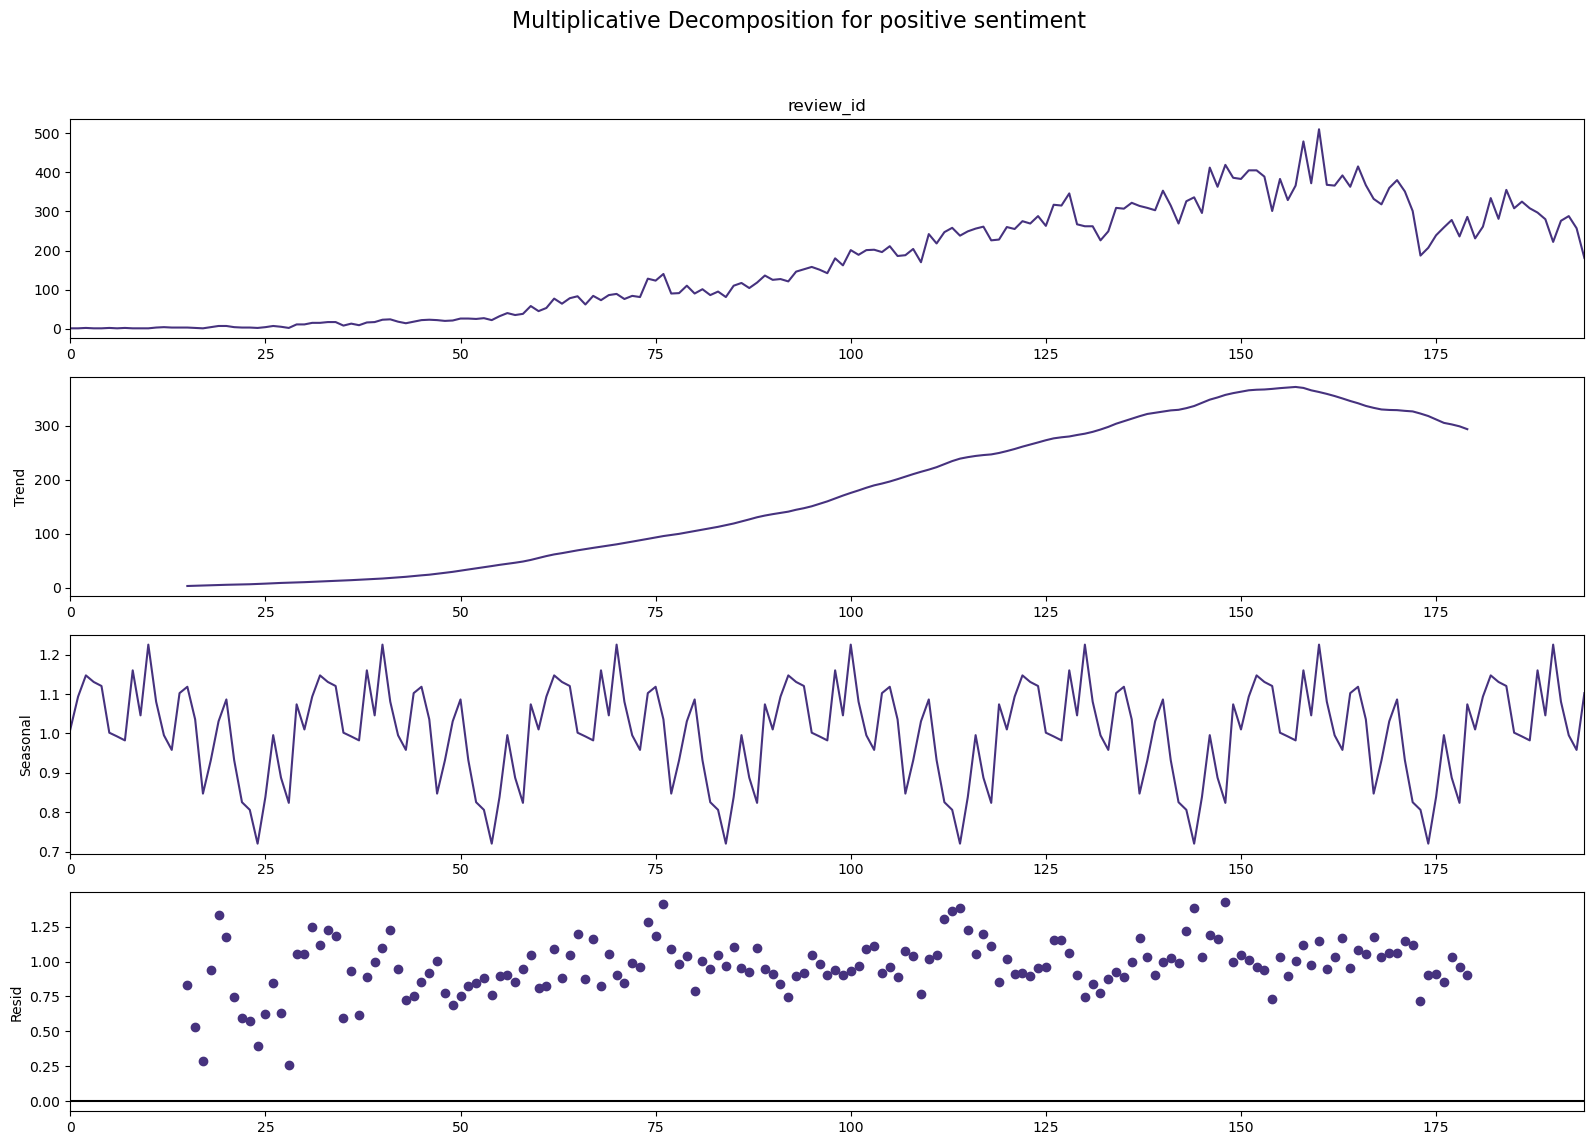

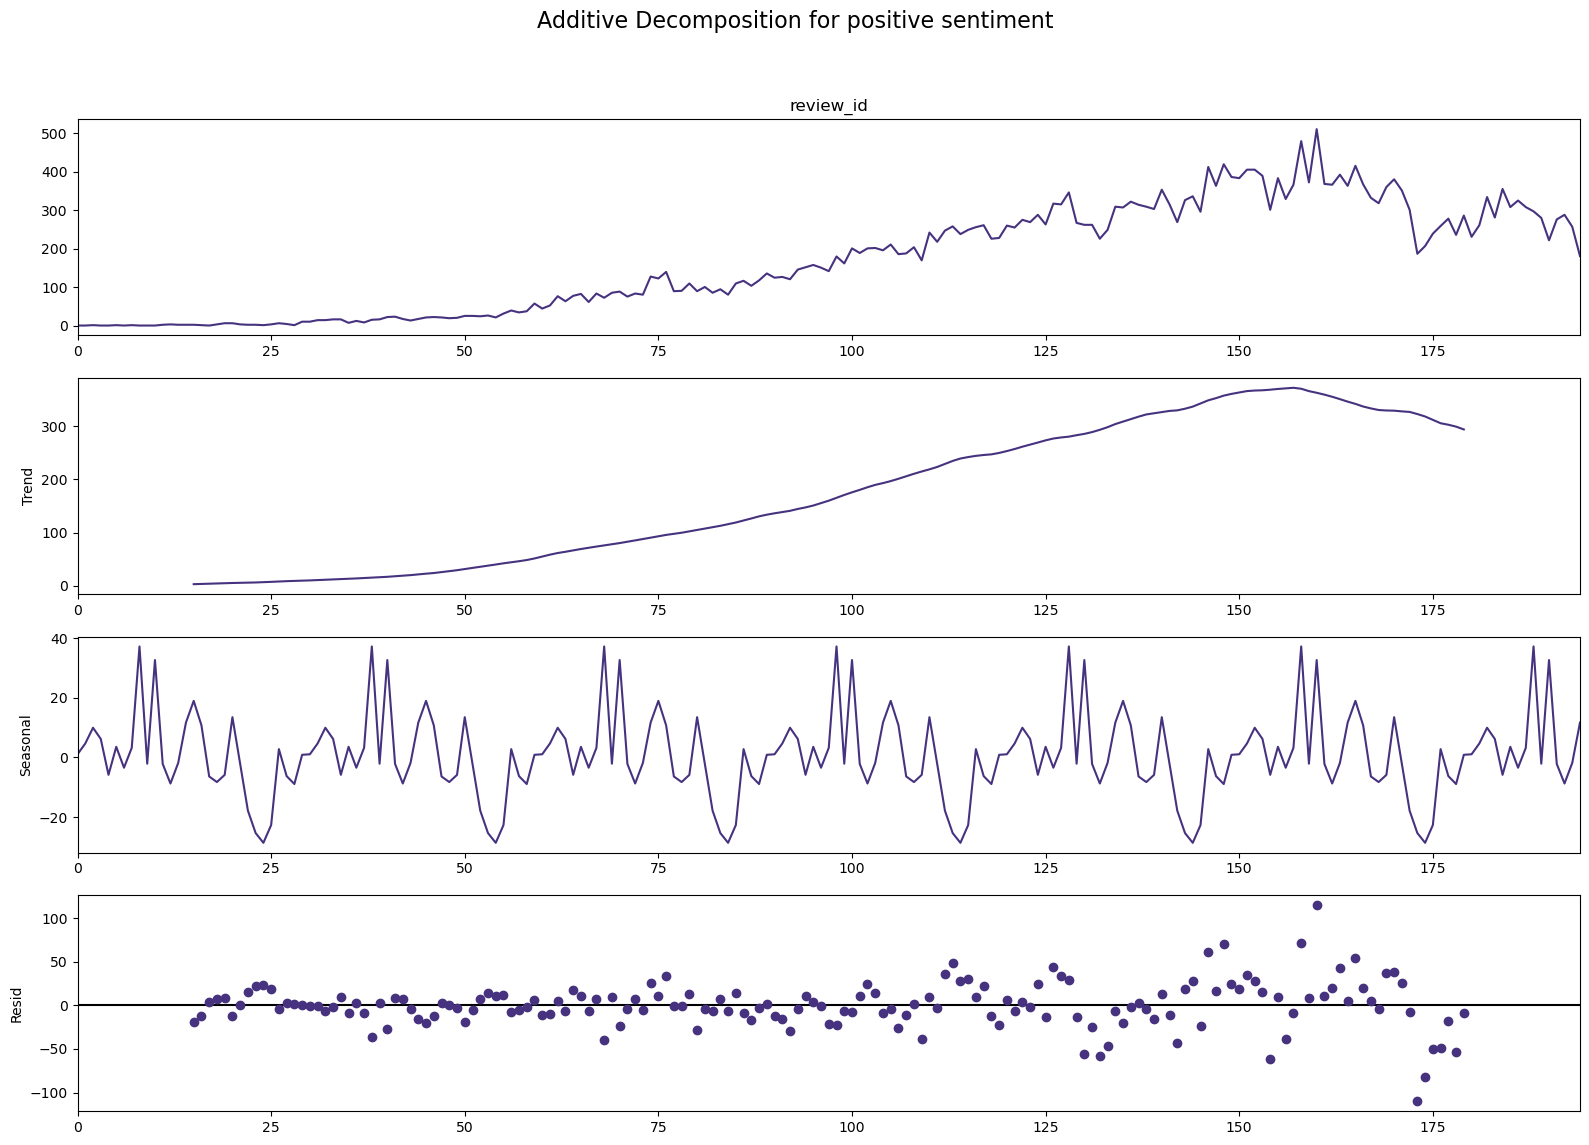

In [16]:
##### Decomposition of a time series can be performed by considering the series as an additive or multiplicative combination of the base level, trend, seasonal index and the residual term.
##The seasonal_decompose in statsmodels implements this conveniently.

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(pos_pp['review_id'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(pos_pp['review_id'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition for positive sentiment', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition for positive sentiment', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

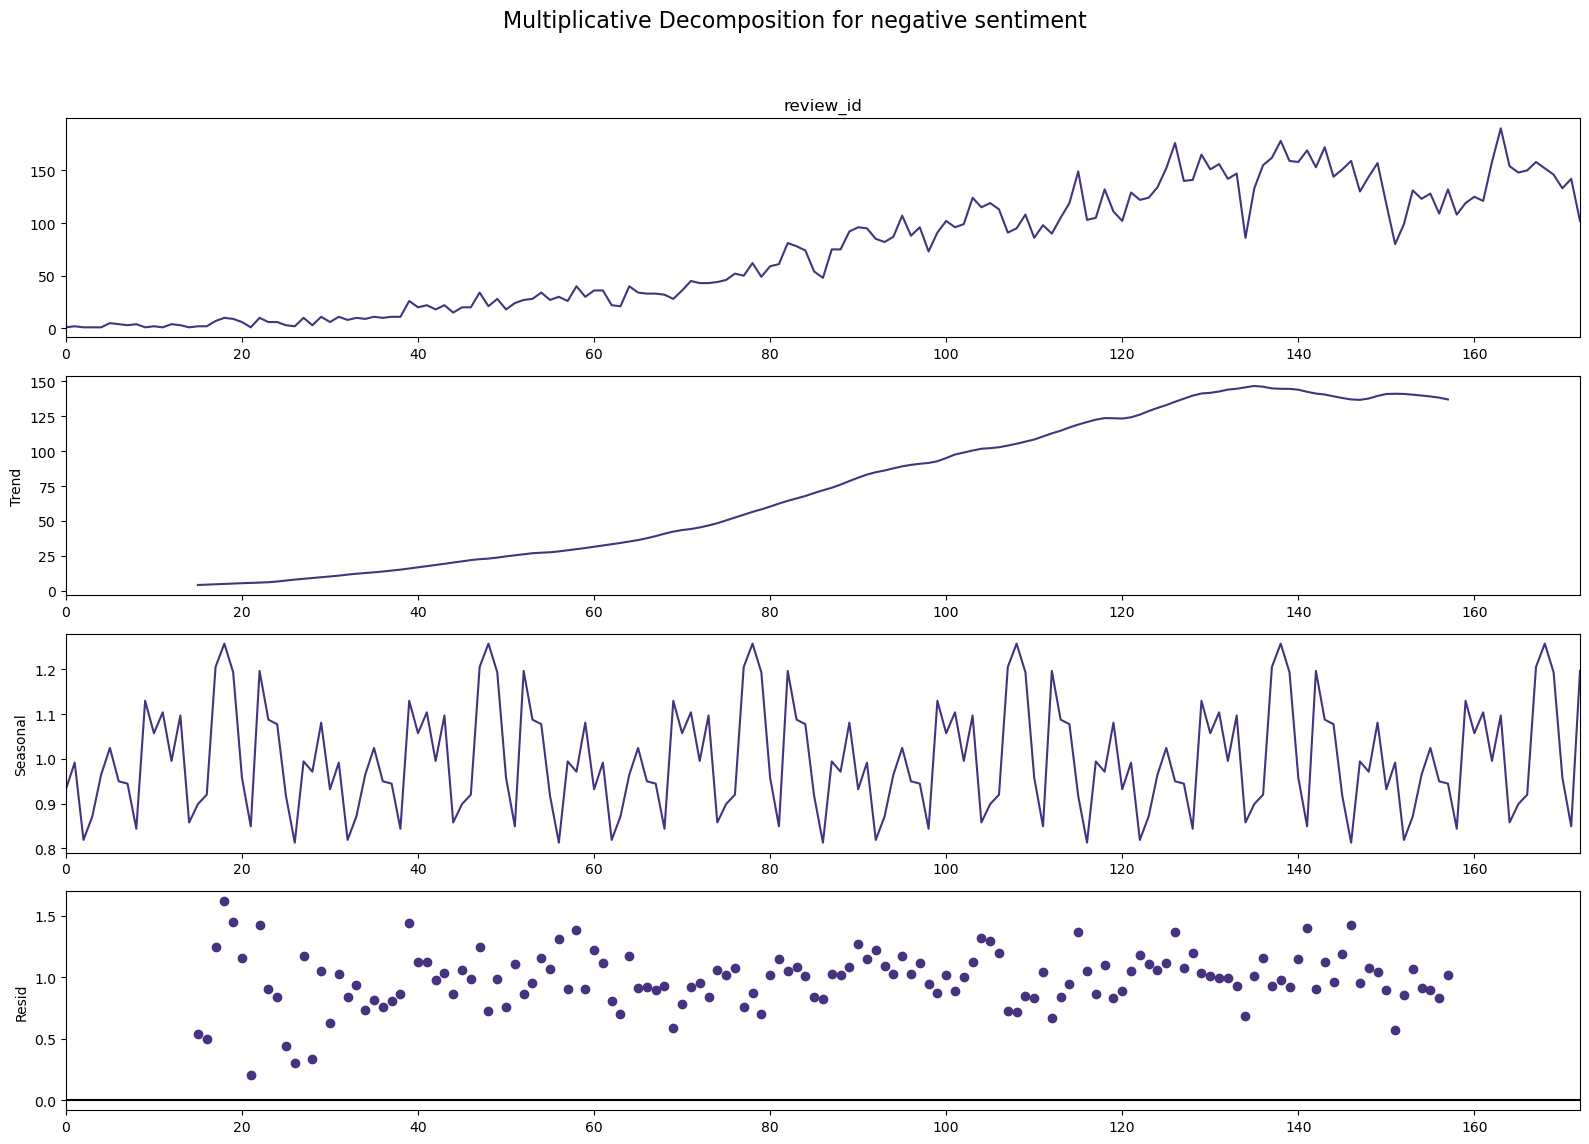

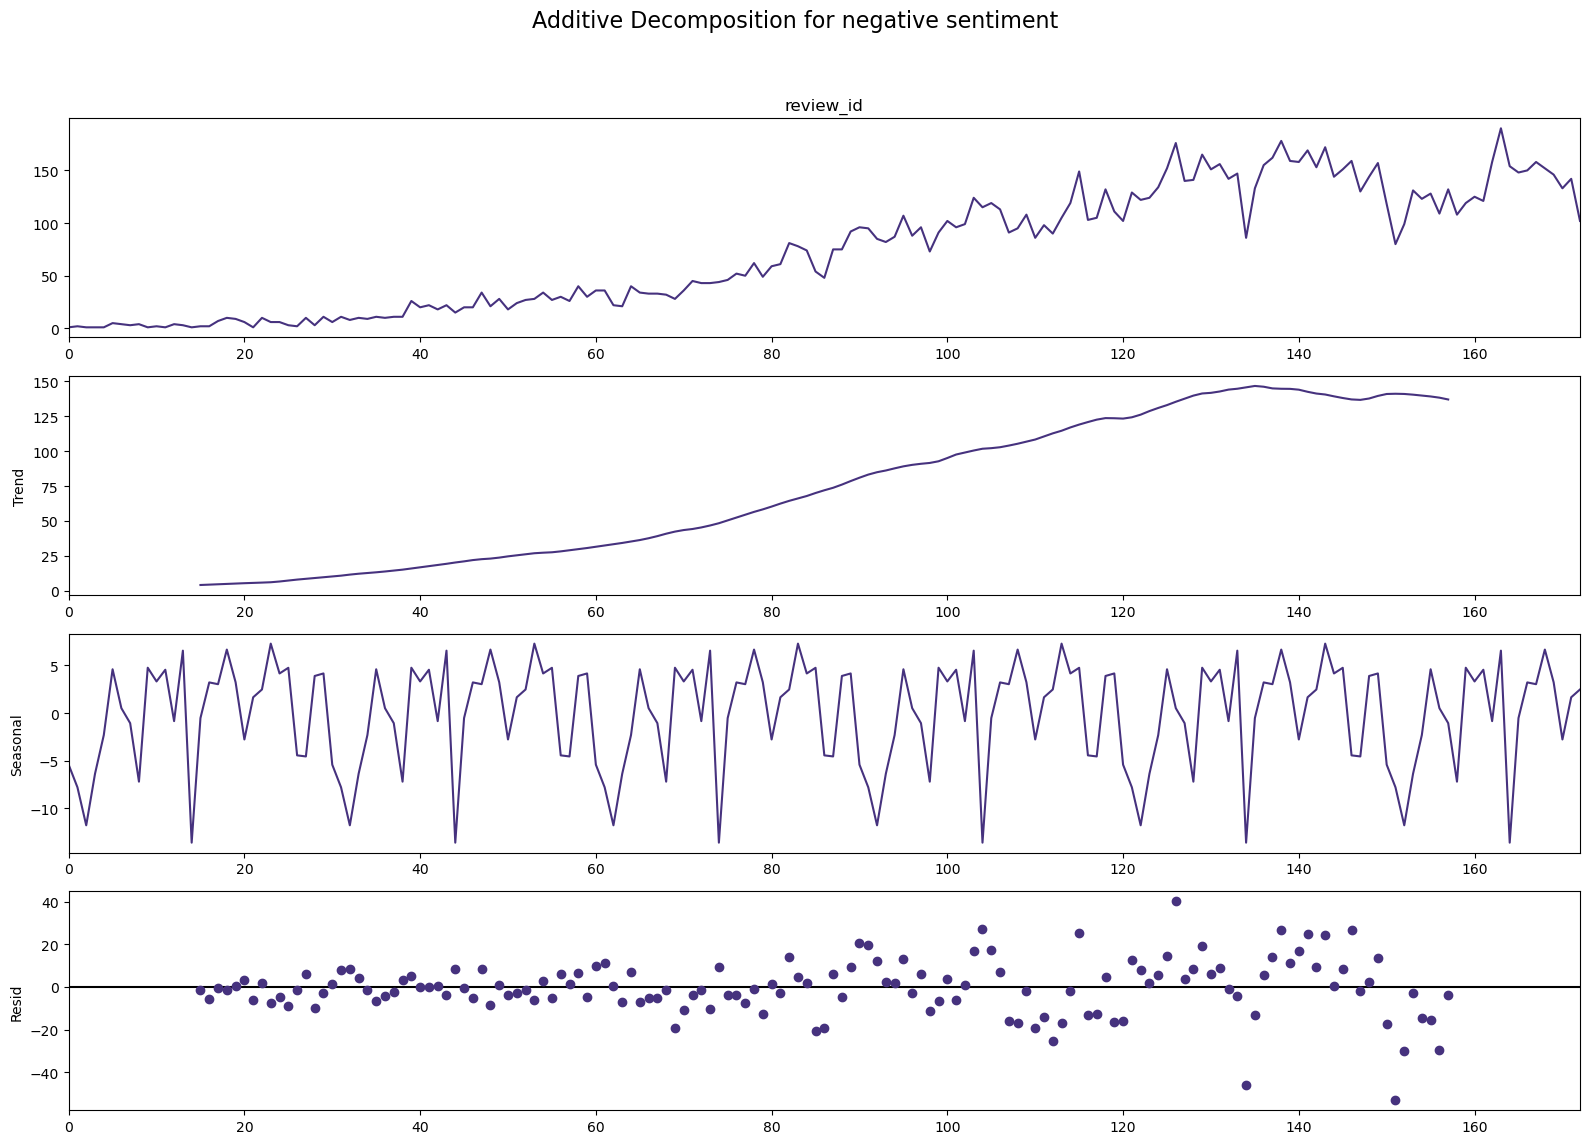

In [17]:
##### Decomposition of a time series can be performed by considering the series as an additive or multiplicative combination of the base level, trend, seasonal index and the residual term.
##The seasonal_decompose in statsmodels implements this conveniently.

# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(neg_pp['review_id'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(neg_pp['review_id'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition for negative sentiment', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition for negative sentiment', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

In [18]:
##### Decomposition of a time series can be performed by considering the series as an additive or multiplicative combination of the base level, trend, seasonal index and the residual term.
##The seasonal_decompose in statsmodels implements this conveniently.

# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df_num['sentiment_count_diff'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df_num['sentiment_count_diff'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition for sentiment difference', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition for sentiment difference', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

ValueError: Multiplicative seasonality is not appropriate for zero and negative values

# 3. DM - Data Modeling

## 3.1. DM - Exponential Smoothing

In [19]:
alpha = 0.9
beta = 0.9
gamma = 0.9

### 3.1.1. DM - Exponential Smoothing - Positive reviews

In [26]:
SimpleExpSmoothing_pos_model, SimpleExpSmoothing_pos_results = utils.ExponentialSmoothingModeling(model_type = 'simple', 
                                                                                    sentiment_data = pos_pp, 
                                                                                    alpha = alpha)

In [27]:
Holt_NotDamped_pos_model, Holt_NotDamped_pos_results = utils.ExponentialSmoothingModeling(model_type = 'holt', 
                                                                            sentiment_data = pos_pp,
                                                                            alpha = alpha, 
                                                                            beta = beta,
                                                                            damped = False)

Holt_Damped_pos_model, Holt_Damped_neg_pos_results = utils.ExponentialSmoothingModeling(model_type = 'holt', 
                                                                      sentiment_data = pos_pp, 
                                                                      alpha = alpha, 
                                                                      beta = beta,
                                                                      damped = True)

In [31]:
HoltWinters_Add_NotDamped_pos_model, HoltWinters_Add_NotDamped_pos_results = utils.ExponentialSmoothingModeling(model_type = 'holt', 
                                                                                          sentiment_data = pos_pp, 
                                                                                          decomposition_type = 'additive',
                                                                                          alpha = alpha, 
                                                                                          beta = beta, 
                                                                                          gamma = gamma,
                                                                                          damped = False)

HoltWinters_Add_Damped_pos_model, HoltWinters_Add_Damped_pos_results = utils.ExponentialSmoothingModeling(model_type = 'holt', 
                                                                                    sentiment_data = pos_pp, 
                                                                                    alpha = alpha, 
                                                                                    beta = beta, 
                                                                                    gamma = gamma,
                                                                                    decomposition_type = 'additive', 
                                                                                    damped = True)


HoltWinters_Multi_NotDamped_pos_model, HoltWinters_Multi_NotDamped_pos_results = utils.ExponentialSmoothingModeling(model_type = 'holt', 
                                                                                          sentiment_data = pos_pp, 
                                                                                          decomposition_type = 'multiplicative',
                                                                                          alpha = alpha, 
                                                                                          beta = beta, 
                                                                                          gamma = gamma,
                                                                                          damped = False)

HoltWinters_Multi_Damped_pos_model, HoltWinters_Multi_Damped_pos_results = utils.ExponentialSmoothingModeling(model_type = 'holt', 
                                                                                    sentiment_data = pos_pp, 
                                                                                    alpha = alpha, 
                                                                                    beta = beta, 
                                                                                    gamma = gamma,
                                                                                    decomposition_type = 'multiplicative', 
                                                                                    damped = True)

### 3.1.2. DM - Exponential Smoothing - Negative reviews

In [23]:
SimpleExpSmoothing_neg_model, SimpleExpSmoothing_neg_results = utils.ExponentialSmoothingModeling(model_type = 'simple', 
                                                                                                  sentiment_data = neg_pp, 
                                                                                                  alpha = alpha)

In [24]:
Holt_NotDamped_neg_model, Holt_NotDamped_neg_results = utils.ExponentialSmoothingModeling(model_type = 'holt', 
                                                                                          sentiment_data = neg_pp,
                                                                                          alpha = alpha, 
                                                                                          beta = beta,
                                                                                          damped = False)

Holt_Damped_neg_model, Holt_Damped_results = utils.ExponentialSmoothingModeling(model_type = 'holt', 
                                                                                sentiment_data = neg_pp, 
                                                                                alpha = alpha, 
                                                                                beta = beta,
                                                                                damped = True)

In [30]:
HoltWinters_Add_NotDamped_neg_model, HoltWinters_Add_NotDamped_neg_results = utils.ExponentialSmoothingModeling(model_type = 'holt', 
                                                                                                        sentiment_data = neg_pp, 
                                                                                                        decomposition_type = 'additive',
                                                                                                        alpha = alpha, 
                                                                                                        beta = beta, 
                                                                                                        gamma = gamma,
                                                                                                        damped = False)

HoltWinters_Add_Damped_neg_model, HoltWinters_Add_Damped_neg_results = utils.ExponentialSmoothingModeling(model_type = 'holt', 
                                                                                                  sentiment_data = neg_pp, 
                                                                                                  alpha = alpha, 
                                                                                                  beta = beta, 
                                                                                                  gamma = gamma,
                                                                                                  decomposition_type = 'additive', 
                                                                                                  damped = True)


HoltWinters_Multi_NotDamped_neg_model, HoltWinters_Multi_NotDamped_neg_results = utils.ExponentialSmoothingModeling(model_type = 'holt', 
                                                                                                        sentiment_data = neg_pp, 
                                                                                                        decomposition_type = 'multiplicative',
                                                                                                        alpha = alpha, 
                                                                                                        beta = beta, 
                                                                                                        gamma = gamma,
                                                                                                        damped = False)

HoltWinters_Multi_Damped_neg_model, HoltWinters_Multi_Damped_neg_results = utils.ExponentialSmoothingModeling(model_type = 'holt', 
                                                                                                  sentiment_data = neg_pp, 
                                                                                                  alpha = alpha, 
                                                                                                  beta = beta, 
                                                                                                  gamma = gamma,
                                                                                                  decomposition_type = 'multiplicative', 
                                                                                                  damped = True)

##### Stationary and Non-Stationary Time Series 

In [29]:
# Convert 'Date' column to a numeric representation
pos_pp['date'] = pos_pp['date'].apply(lambda x: x.timestamp())
neg_pp['date'] = neg_pp['date'].apply(lambda x: x.timestamp())

# Checking the result
display(pos_pp)

,date,review_id
0,1.109635e+09,13
1,1.112314e+09,6
2,1.114906e+09,1
3,1.117584e+09,8
4,1.120176e+09,8
...,...,...
198,1.630454e+09,1672
199,1.633046e+09,1928
200,1.635725e+09,1851
201,1.638317e+09,1826


ADF Statistic: -1.3454174838912158
p-value: 0.6081462971702416
Critical Values:
   1%: -3.465620397124192
   5%: -2.8770397560752436
   10%: -2.5750324547306476


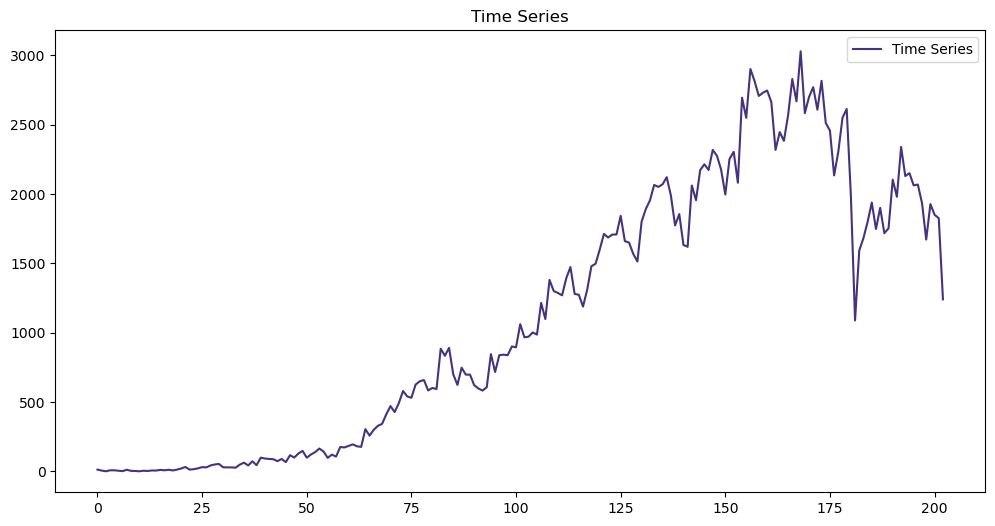

In [30]:
# Check stationarity for the example time series
#Augmented Dickey-Fuller (ADF) test, a common statistical test for stationarity
utils.check_stationarity(pos_pp['review_id'])

#### The high p-value and the ADF statistic being greater than the critical values suggest that we fail to reject the null hypothesis. The null hypothesis of the ADF test is that the time series has a unit root and is non-stationary.

ADF Statistic: -1.434231165886638
p-value: 0.5657597541520768
Critical Values:
   1%: -3.465058702600837
   5%: -2.8767942675230356
   10%: -2.5749014492475535


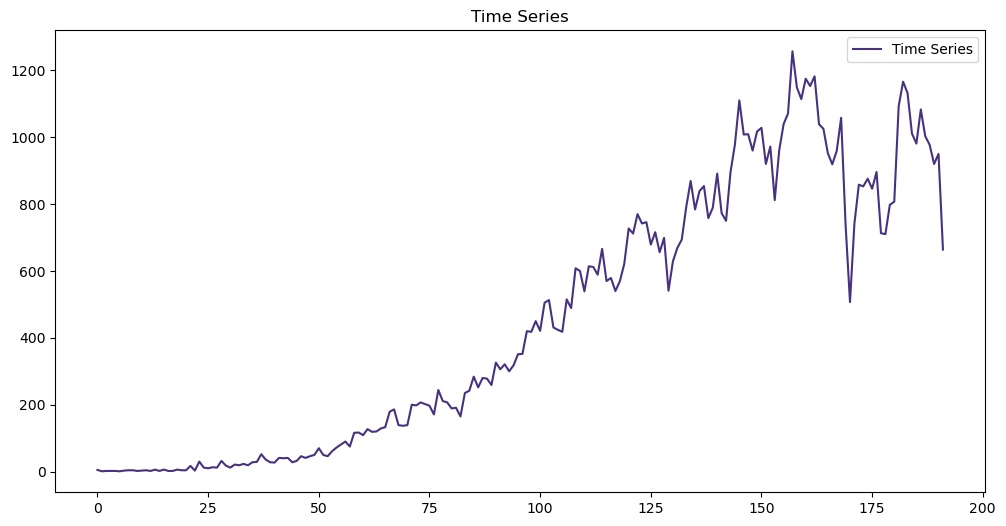

In [31]:
def check_stationarity(ts):
    # ADF test
    result = adfuller(ts, autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
    
    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(ts, label='Time Series')
    plt.title('Time Series')
    plt.legend()
    plt.show()

# Check stationarity for the example time series
check_stationarity(neg_pp['review_id'])

#### The high p-value and the ADF statistic being greater than the critical values suggest that we fail to reject the null hypothesis. The null hypothesis of the ADF test is that the time series has a unit root and is non-stationary.

ADF Statistic: -1.4815130699444683
p-value: 0.5426359337105198
Critical Values:
   1%: -3.465620397124192
   5%: -2.8770397560752436
   10%: -2.5750324547306476


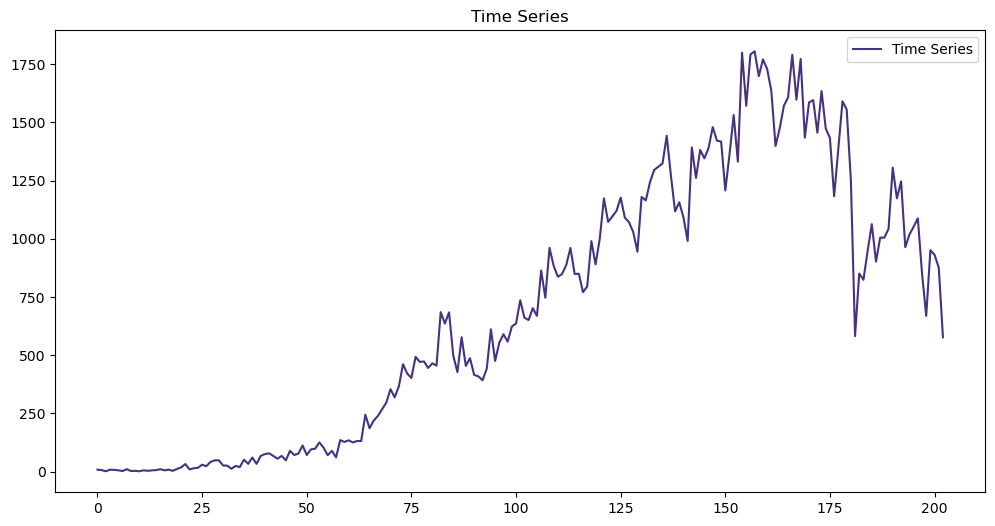

In [32]:
# Check stationarity for the example time series
utils.check_stationarity(df_num['sentiment_count_diff'])

###### below I am testing if the moving average makes the time series stationary
###### but is failed

https://towardsdatascience.com/stationarity-in-time-series-analysis-90c94f27322

In [33]:
pos_pp['moving_avg'] = pos_pp['review_id'].rolling(window=6).mean()
# Drop NaN values (resulting from the rolling mean operation)
pos_pp.dropna(inplace=True)

ADF Statistic: -1.220139156147966
p-value: 0.6648729156827353
Critical Values:
   1%: -3.4668001583460613
   5%: -2.8775552336674317
   10%: -2.5753075498128246


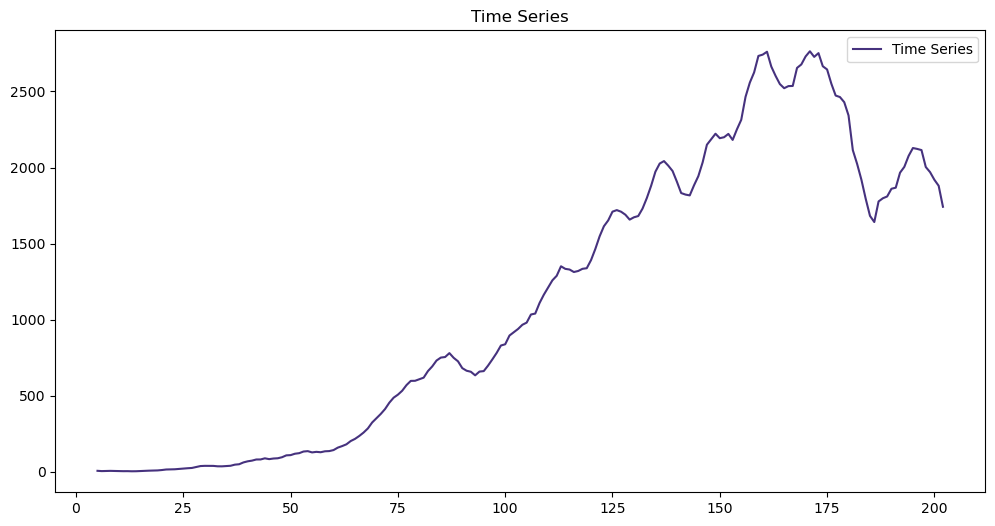

In [34]:
# Check stationarity for the example time series
utils.check_stationarity(pos_pp['moving_avg'])

In [35]:
#Here we are to use the differencing method to make the time series stationary
#This involves subtracting each observation from the one preceding it. You can also try second-order differencing if needed.
pos_pp['stationary_series'] = pos_pp['review_id'] - pos_pp['review_id'].shift(12)
pos_pp.dropna(inplace=True)

ADF Statistic: -2.4702348026898413
p-value: 0.1228854871642075
Critical Values:
   1%: -3.4756368462466662
   5%: -2.8814104466172608
   10%: -2.5773652982553568


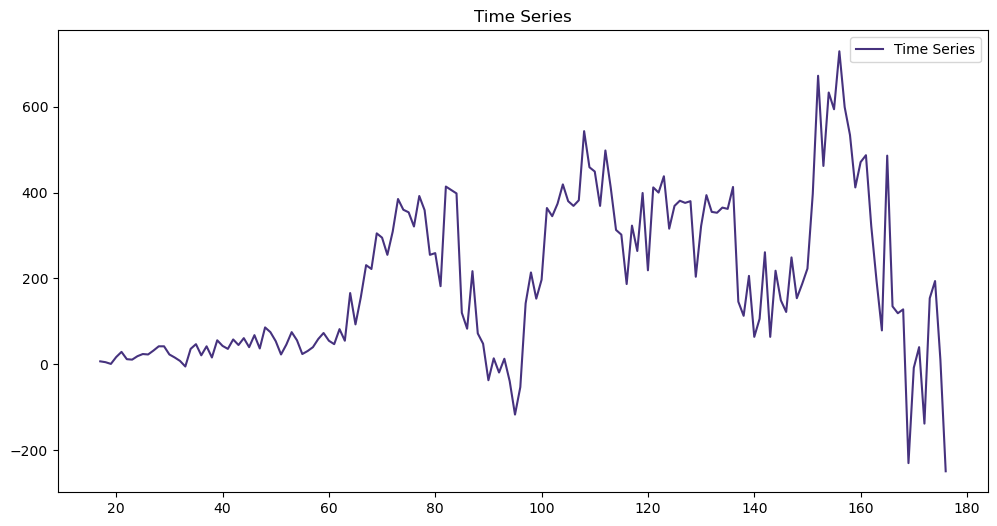

In [36]:
# Check stationarity for the example time series
check_stationarity(pos_pp.head(160)['stationary_series'])

##### The ADF Statistic is more extreme (in the rejection region) than the critical values at all typical significance levels (1%, 5%, 10%).
Therefore, you would reject the null hypothesis, indicating that there is enough evidence to conclude that your time series is stationary. A lower p-value and a more extreme ADF Statistic provide stronger evidence against the null hypothesis of non-stationarity.

In summary, your time series appears to be stationary based on the ADF test results.

/Users/luish/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


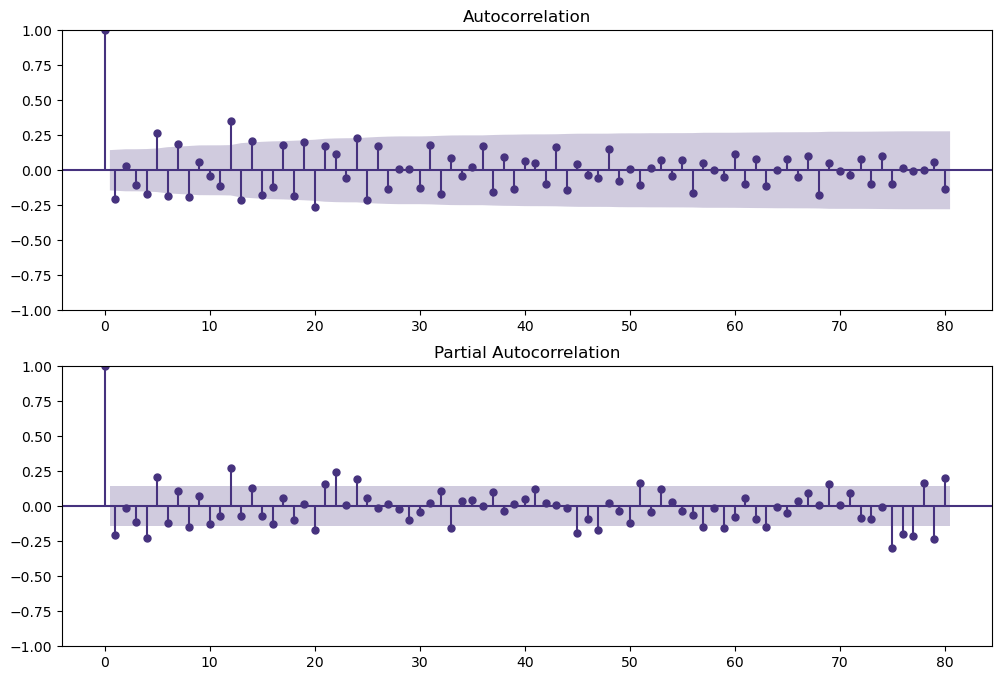

In [37]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#pos['date'] = pos['date'].apply(lambda x: x.timestamp())
# Assuming your time series is stored in 'ts'
ts_diff = pos_pp['review_id'].diff().dropna()  # Differencing to achieve stationarity

# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(ts_diff, ax=ax1, lags=80)

/Users/luish/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/luish/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/luish/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/luish/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/luish/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: Use

                               SARIMAX Results                                
Dep. Variable:              review_id   No. Observations:                  186
Model:               ARIMA(12, 1, 12)   Log Likelihood               -1172.051
Date:                Mon, 02 Oct 2023   AIC                           2394.103
Time:                        18:36:22   BIC                           2474.612
Sample:                             0   HQIC                          2426.731
                                - 186                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0610      0.573      0.106      0.915      -1.062       1.184
ar.L2          0.1201      0.605      0.199      0.843      -1.066       1.306
ar.L3         -0.0849      0.485     -0.175      0.8

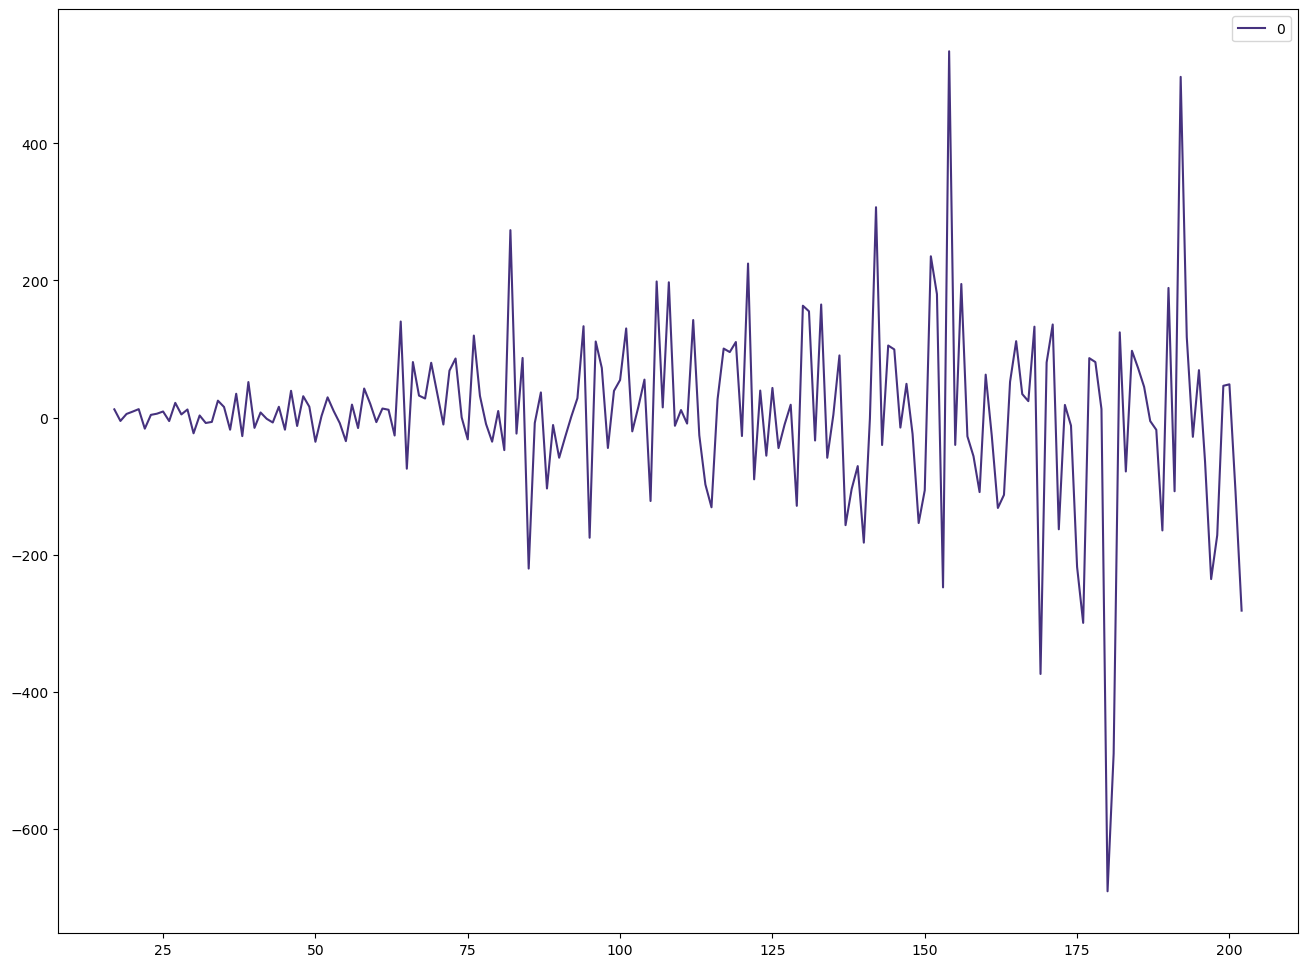

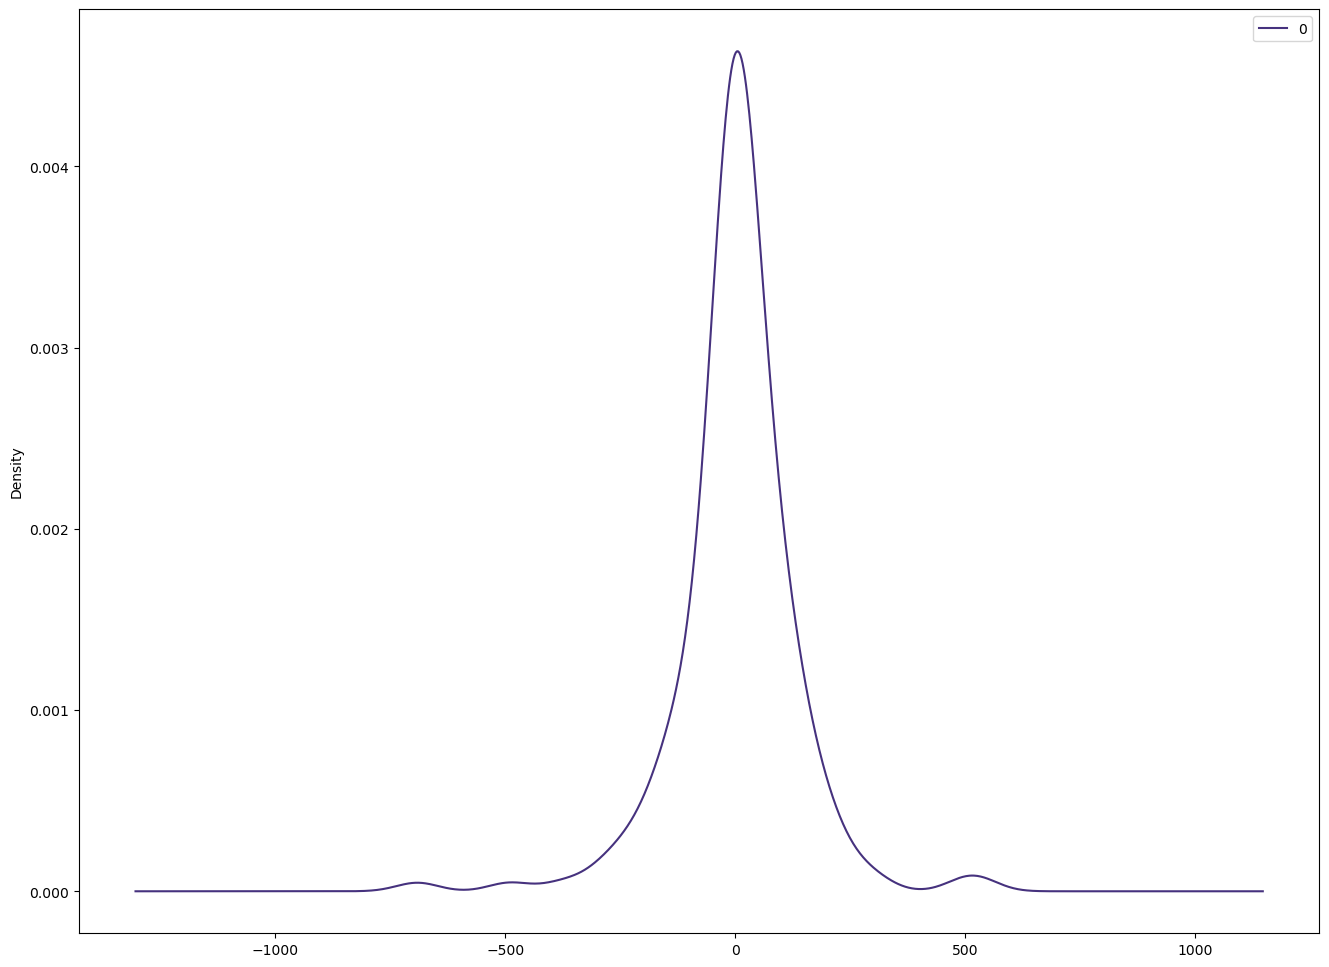

                0
count  186.000000
mean     3.903478
std    129.289812
min   -690.927973
25%    -30.827390
50%      5.477072
75%     52.090177
max    534.264158


In [38]:
# fit model
model = ARIMA(pos_pp['review_id'], order=(12,1,12))  #p,d,q
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

/Users/luish/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/luish/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/luish/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


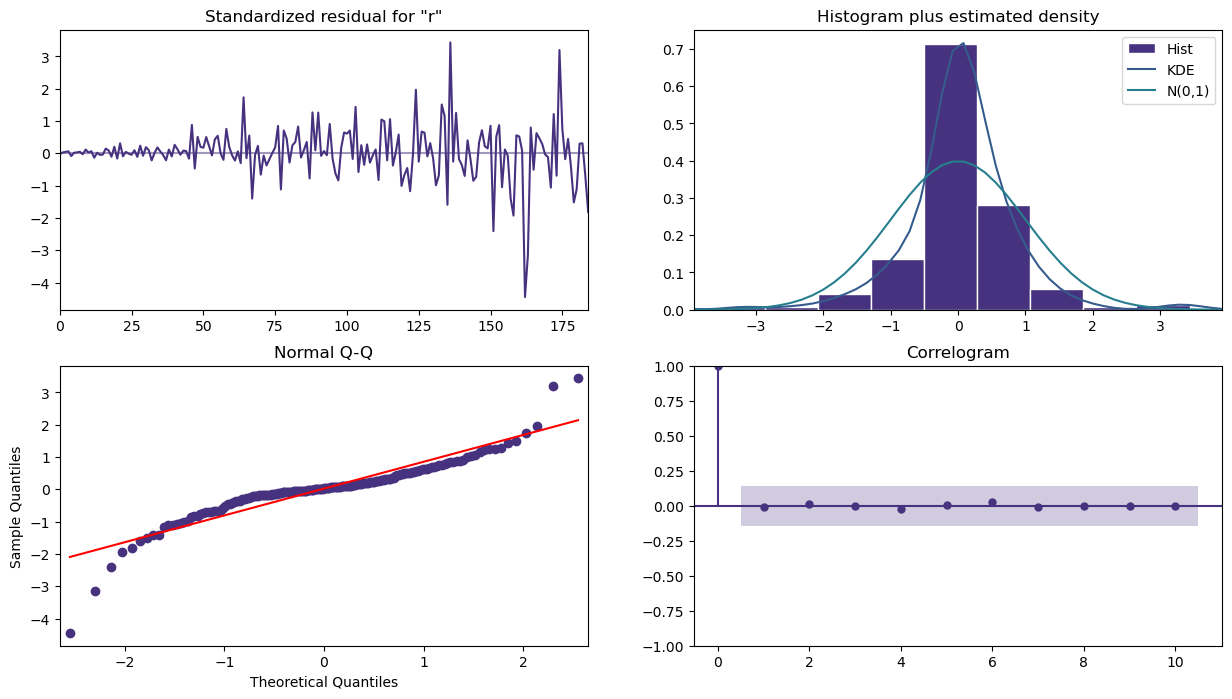

/Users/luish/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


TypeError: unsupported operand type(s) for +: 'numpy.int64' and 'DateOffset'

In [39]:
# Plot residuals
results = model.fit()
results.plot_diagnostics(figsize=(15, 8))
plt.show()

# Forecast future values
forecast_steps = 12  # Adjust as needed
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(df.index[-1] + pd.DateOffset(1), periods=forecast_steps, freq='M')
forecast_df = pd.DataFrame({'forecast': forecast.predicted_mean.values}, index=forecast_index)

# Plot the original time series and the forecast
plt.plot(df['review_id'], label='Original Time Series')
plt.plot(forecast_df['forecast'], label='Forecast')
plt.legend()
plt.show()